# Data Engineering and Exploration of Medical Protests using GDELT
### Developed by Abhinav Sharma

### This notebook covers the Testing and Data Validation part of the project. We will be creating developing ML models in order to validate the target feature which we have generated. The target values belong to {0,1}, where 0 signifies that the event will not lead to a protest and 1 signifies that the event will lead to a protest. All the events present in the dataset lie within the event_root_code {10,11,12,13}. We will be identifying which model produces most accurate results as well as the important features associated with the model.

#### Import Dependencies

In [1]:
%%time
#importing necessary packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn import metrics
from xgboost import XGBClassifier

Wall time: 2 s


#### Reading Data and Exploration

In [2]:
%%time
df=pd.read_csv('Balanced_Data_No_Protest_Code_Significant.csv') #df stores data from the file
df.head()

Wall time: 647 ms


,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED,Target
0,410400350,20150218,201502,2015.1315,1,111,111,11,-2.0,7,...,55.8667,-3.150,4,55.8667,-3.150,4,55.8667,-3.1500,20150218220000,0
1,410400566,20150218,201502,2015.1315,0,112,112,11,-2.0,2,...,47.5002,-111.301,3,47.5002,-111.301,3,47.5002,-111.3010,20150218220000,0
2,410402191,20150218,201502,2015.1315,0,130,130,13,-4.4,10,...,45.1667,15.500,1,45.1667,15.500,1,45.1667,15.5000,20150218220000,0
3,410402316,20150218,201502,2015.1315,1,130,130,13,-4.4,10,...,45.1667,15.500,1,45.1667,15.500,1,45.1667,15.5000,20150218220000,0
4,410403208,20150218,201502,2015.1315,1,1123,112,11,-2.0,2,...,27.0000,30.000,1,27.0000,30.000,4,32.7670,22.6367,20150218221500,0


In [3]:
%%time
df['EventRootCode'].value_counts()

Wall time: 7.98 ms


11    211663
12     83740
13     53653
10     46590
Name: EventRootCode, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015467ADF9D0>,
      dtype=object)

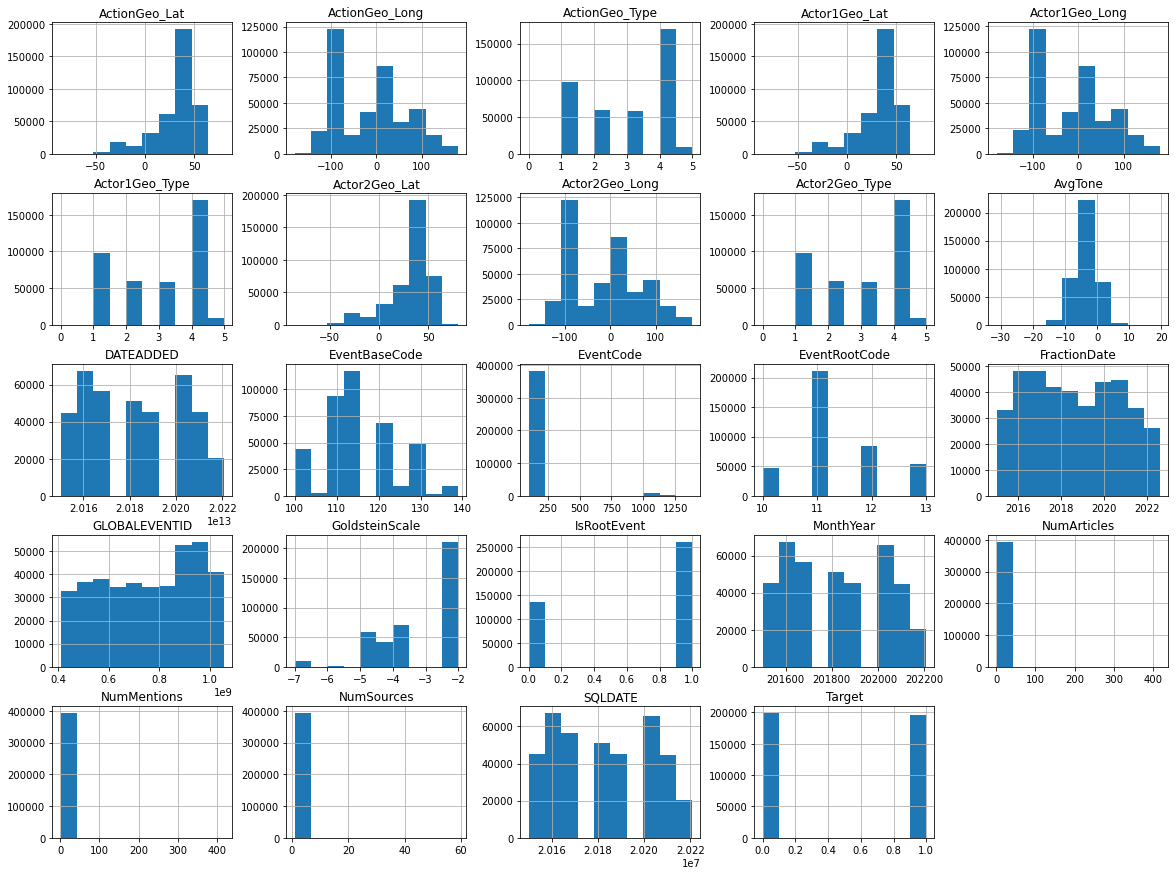

In [4]:
df.hist(figsize=(20,15))

#### Input and Target Features

In [5]:
Y=df['Target'].copy()
X=df.drop('Target',axis=1).copy()

In [6]:
X.dtypes

GLOBALEVENTID       int64
SQLDATE             int64
MonthYear           int64
FractionDate      float64
IsRootEvent         int64
EventCode           int64
EventBaseCode       int64
EventRootCode       int64
GoldsteinScale    float64
NumMentions         int64
NumSources          int64
NumArticles         int64
AvgTone           float64
Actor1Geo_Type      int64
Actor1Geo_Lat     float64
Actor1Geo_Long    float64
Actor2Geo_Type      int64
Actor2Geo_Lat     float64
Actor2Geo_Long    float64
ActionGeo_Type      int64
ActionGeo_Lat     float64
ActionGeo_Long    float64
DATEADDED           int64
dtype: object

#### Train and Test Data

In [7]:
#this code takes our data after cleaning and splits it into the testing set and training set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y, random_state=42)

#### Decision Tree

In [8]:
#instantiate and fit model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_model = dt_clf.fit(X_train, Y_train)

In [9]:
#Performing prediction
Y_pred_dt = dt_model.predict(X_test)
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_dt))
print("balanced_accuracy:",metrics.balanced_accuracy_score(Y_test, Y_pred_dt))
print("brier_score_loss:",metrics.brier_score_loss(Y_test, Y_pred_dt))
print("f1_score:",metrics.f1_score(Y_test,Y_pred_dt))
print("recall_score:",metrics.recall_score(Y_test, Y_pred_dt))
print("precision_score:",metrics.precision_score(Y_test, Y_pred_dt))
print("roc_auc_score:",metrics.roc_auc_score(Y_test, Y_pred_dt))

Gini stats
Accuracy: 0.9313834519572953
balanced_accuracy: 0.9313999028035542
brier_score_loss: 0.06861654804270463
f1_score: 0.9308401691547359
recall_score: 0.9330173840214083
precision_score: 0.9286730917815461
roc_auc_score: 0.9313999028035542


True Negatives: 46451
False Postives: 3508
False Negatives: 3279
True Positive: 45674
Recall: 0.9330173840214083
Precision: 0.9286730917815461
Prevalence: 0.49491467162730507


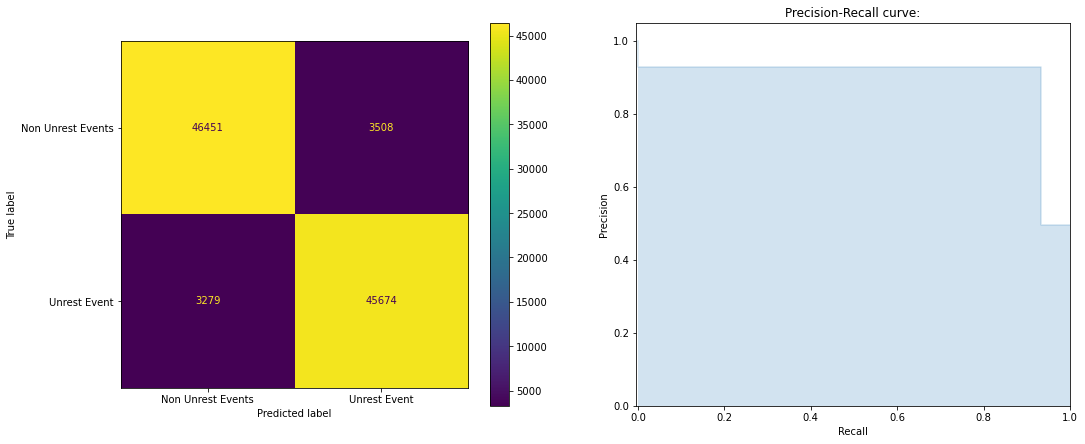

In [10]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_pred_dt)

#this code plots the confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
metrics.plot_confusion_matrix(dt_model, X_test, Y_test, display_labels=["Non Unrest Events", "Unrest Event"], ax=ax1)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred_dt).ravel()

ax2.step(recall, precision, alpha=0.2, where='post')
ax2.fill_between(recall, precision, step='post', alpha=0.2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([-0.005, 1.0])
ax2.set_title('Precision-Recall curve:')

print('True Negatives:', tn)
print('False Postives:', fp)
print('False Negatives:', fn)
print('True Positive:', tp)
print('Recall:', tp/(fn+tp))
print('Precision:', tp/(fp+tp))
print('Prevalence:', (fn+tp)/(tn+fp+fn+tp))

#### Random Forest

In [11]:
%%time
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_model=rf.fit(X_train, Y_train);

Wall time: 10min 13s


In [12]:
#Making predictions
Y_pred_rf = rf_model.predict(X_test)

In [13]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rf))
print("balanced_accuracy:",metrics.balanced_accuracy_score(Y_test, Y_pred_rf))
print("brier_score_loss:",metrics.brier_score_loss(Y_test, Y_pred_rf))
print("f1_score:",metrics.f1_score(Y_test,Y_pred_rf))
print("recall_score:",metrics.recall_score(Y_test, Y_pred_rf))
print("precision_score:",metrics.precision_score(Y_test, Y_pred_rf))
print("roc_auc_score:",metrics.roc_auc_score(Y_test, Y_pred_rf))

Gini stats
Accuracy: 0.945830637334196
balanced_accuracy: 0.9456549427012899
brier_score_loss: 0.054169362665803945
f1_score: 0.9443336242363796
recall_score: 0.9283802831287153
precision_score: 0.960844838157255
roc_auc_score: 0.9456549427012899


True Negatives: 48107
False Postives: 1852
False Negatives: 3506
True Positive: 45447
Recall: 0.9283802831287153
Precision: 0.960844838157255
Prevalence: 0.49491467162730507


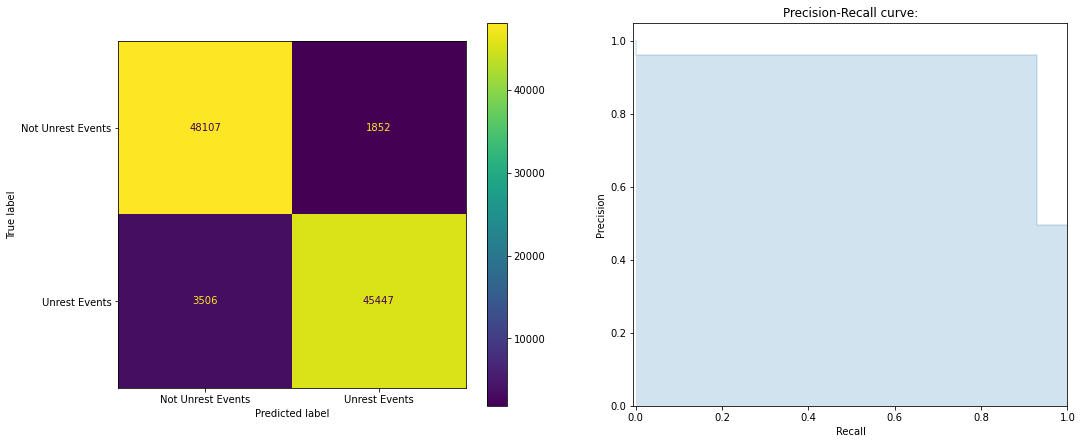

In [14]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_pred_rf)

#this code plots the confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
metrics.plot_confusion_matrix(rf_model, X_test, Y_test, display_labels=["Not Unrest Events", "Unrest Events"], ax=ax1)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred_rf).ravel()

ax2.step(recall, precision, alpha=0.2, where='post')
ax2.fill_between(recall, precision, step='post', alpha=0.2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([-0.005, 1.0])
ax2.set_title('Precision-Recall curve:')

print('True Negatives:', tn)
print('False Postives:', fp)
print('False Negatives:', fn)
print('True Positive:', tp)
print('Recall:', tp/(fn+tp))
print('Precision:', tp/(fp+tp))
print('Prevalence:', (fn+tp)/(tn+fp+fn+tp))

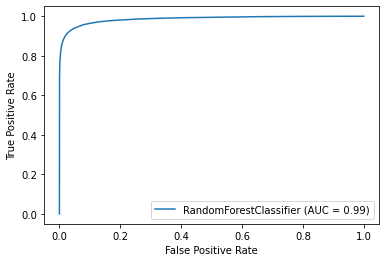

In [15]:
#ROC Curve and AUC metric
plot_roc_curve(rf_model, X_test,Y_test)

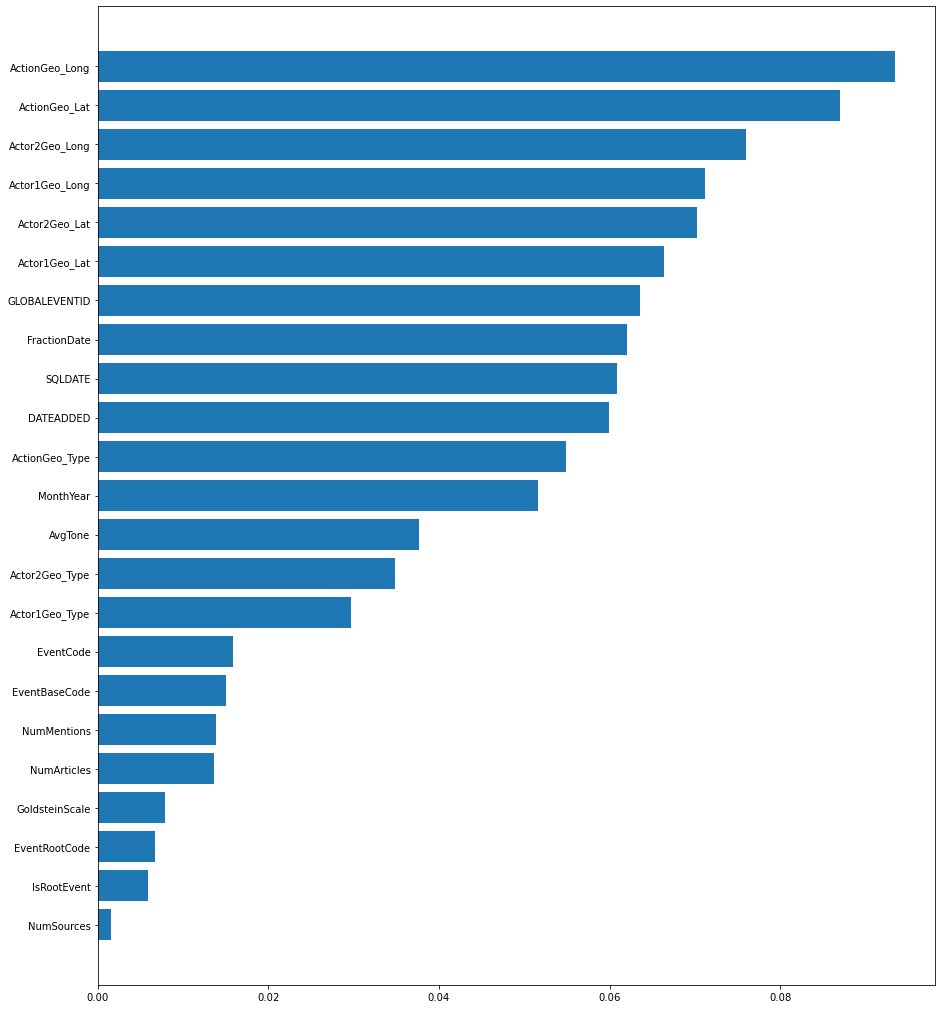

In [16]:
#identifying important features for random forest
important_features = rf_model.feature_importances_

ind = np.argsort(important_features)

fig, ax = plt.subplots(figsize=(15, 18))
ax.barh(range(len(important_features)), important_features[ind])
ax.set_yticks(range(len(important_features)))
_ = ax.set_yticklabels(np.array(X_train.columns)[ind])

#### KNN Classifier Model

In [17]:
#instantiate and fit model
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train, Y_train);

In [18]:
#Making predictions
Y_pred_knn = knn_model.predict(X_test)

In [19]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_knn))
print("balanced_accuracy:",metrics.balanced_accuracy_score(Y_test, Y_pred_knn))
print("brier_score_loss:",metrics.brier_score_loss(Y_test, Y_pred_knn))
print("f1_score:",metrics.f1_score(Y_test,Y_pred_knn))
print("recall_score:",metrics.recall_score(Y_test, Y_pred_knn))
print("precision_score:",metrics.precision_score(Y_test, Y_pred_knn))
print("roc_auc_score:",metrics.roc_auc_score(Y_test, Y_pred_knn))

Gini stats
Accuracy: 0.5696983176965383
balanced_accuracy: 0.5695303985805447
brier_score_loss: 0.43030168230346166
f1_score: 0.5598825305565321
recall_score: 0.5530202439074214
precision_score: 0.5669172617427177
roc_auc_score: 0.5695303985805448


True Negatives: 29278
False Postives: 20681
False Negatives: 21881
True Positive: 27072
Recall: 0.5530202439074214
Precision: 0.5669172617427177
Prevalence: 0.49491467162730507


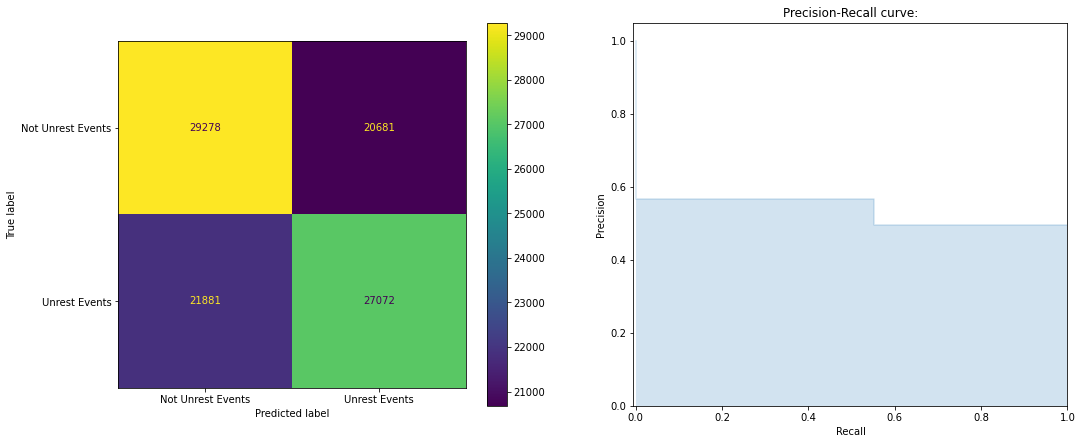

In [20]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_pred_knn)

#this code plots the confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
metrics.plot_confusion_matrix(knn_model, X_test, Y_test, display_labels=["Not Unrest Events", "Unrest Events"], ax=ax1)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred_knn).ravel()

ax2.step(recall, precision, alpha=0.2, where='post')
ax2.fill_between(recall, precision, step='post', alpha=0.2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([-0.005, 1.0])
ax2.set_title('Precision-Recall curve:')

print('True Negatives:', tn)
print('False Postives:', fp)
print('False Negatives:', fn)
print('True Positive:', tp)
print('Recall:', tp/(fn+tp))
print('Precision:', tp/(fp+tp))
print('Prevalence:', (fn+tp)/(tn+fp+fn+tp))

#### Logistic Regression Model

In [21]:
#instantiate and fit model
logr = LogisticRegression()
logr_model=logr.fit(X_train, Y_train);

In [22]:
#Making predictions
Y_pred_logr = logr_model.predict(X_test)

In [23]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_logr))
print("balanced_accuracy:",metrics.balanced_accuracy_score(Y_test, Y_pred_logr))
print("brier_score_loss:",metrics.brier_score_loss(Y_test, Y_pred_logr))
print("f1_score:",metrics.f1_score(Y_test,Y_pred_logr))
print("recall_score:",metrics.recall_score(Y_test, Y_pred_logr))
print("precision_score:",metrics.precision_score(Y_test, Y_pred_logr))
print("roc_auc_score:",metrics.roc_auc_score(Y_test, Y_pred_logr))

Gini stats
Accuracy: 0.5050853283726949
balanced_accuracy: 0.5
brier_score_loss: 0.49491467162730507
f1_score: 0.0
recall_score: 0.0
precision_score: 0.0
roc_auc_score: 0.5


True Negatives: 49959
False Postives: 0
False Negatives: 48953
True Positive: 0
Recall: 0.0
Precision: nan
Prevalence: 0.49491467162730507


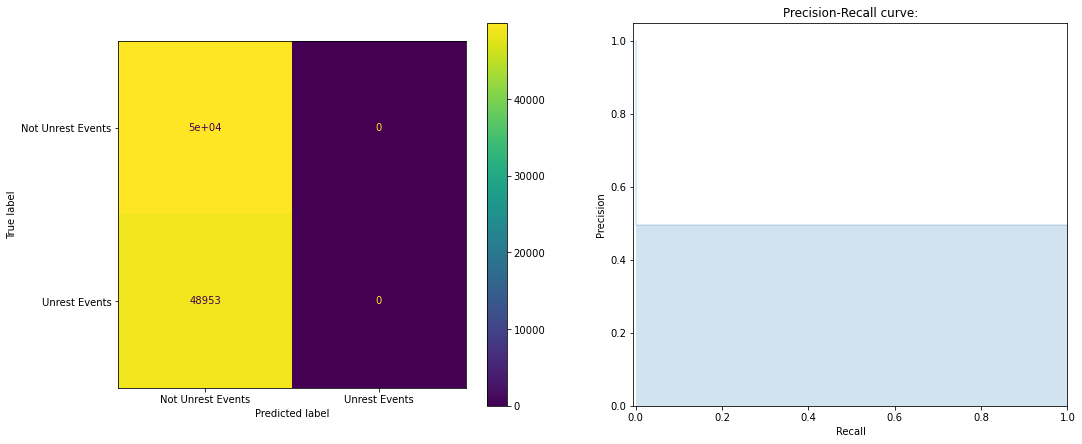

In [24]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_pred_logr)

#this code plots the confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
metrics.plot_confusion_matrix(logr_model, X_test, Y_test, display_labels=["Not Unrest Events", "Unrest Events"], ax=ax1)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred_logr).ravel()

ax2.step(recall, precision, alpha=0.2, where='post')
ax2.fill_between(recall, precision, step='post', alpha=0.2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([-0.005, 1.0])
ax2.set_title('Precision-Recall curve:')

print('True Negatives:', tn)
print('False Postives:', fp)
print('False Negatives:', fn)
print('True Positive:', tp)
print('Recall:', tp/(fn+tp))
print('Precision:', tp/(fp+tp))
print('Prevalence:', (fn+tp)/(tn+fp+fn+tp))

#### XGB Classifier

In [25]:
# fit model on training data
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='aucpr')
xgb_model=xgb.fit(X_train, Y_train);

In [26]:
#Making predictions
Y_pred_xgb = xgb_model.predict(X_test)

In [27]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_xgb))
print("balanced_accuracy:",metrics.balanced_accuracy_score(Y_test, Y_pred_xgb))
print("brier_score_loss:",metrics.brier_score_loss(Y_test, Y_pred_xgb))
print("f1_score:",metrics.f1_score(Y_test,Y_pred_xgb))
print("recall_score:",metrics.recall_score(Y_test, Y_pred_xgb))
print("precision_score:",metrics.precision_score(Y_test, Y_pred_xgb))
print("roc_auc_score:",metrics.roc_auc_score(Y_test, Y_pred_xgb))

Gini stats
Accuracy: 0.8489970883209318
balanced_accuracy: 0.8486379945685342
brier_score_loss: 0.15100291167906826
f1_score: 0.8420573990652032
recall_score: 0.8133311543725614
precision_score: 0.8728871155153136
roc_auc_score: 0.8486379945685342


True Negatives: 44161
False Postives: 5798
False Negatives: 9138
True Positive: 39815
Recall: 0.8133311543725614
Precision: 0.8728871155153136
Prevalence: 0.49491467162730507


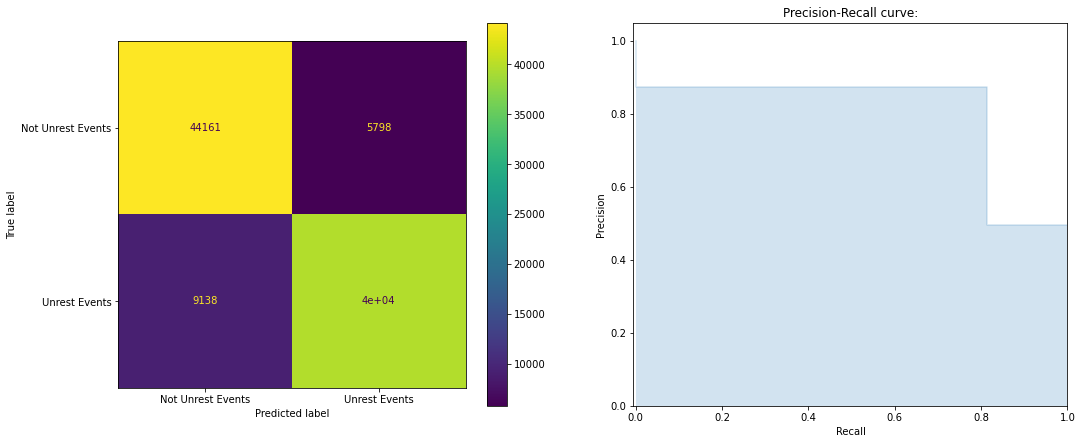

In [28]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_pred_xgb)

#this code plots the confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
metrics.plot_confusion_matrix(xgb_model, X_test, Y_test, display_labels=["Not Unrest Events", "Unrest Events"], ax=ax1)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred_xgb).ravel()

ax2.step(recall, precision, alpha=0.2, where='post')
ax2.fill_between(recall, precision, step='post', alpha=0.2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([-0.005, 1.0])
ax2.set_title('Precision-Recall curve:')

print('True Negatives:', tn)
print('False Postives:', fp)
print('False Negatives:', fn)
print('True Positive:', tp)
print('Recall:', tp/(fn+tp))
print('Precision:', tp/(fp+tp))
print('Prevalence:', (fn+tp)/(tn+fp+fn+tp))

#### Generating Test Output File

In [29]:
# print predictions of random forest
Y_pred_rf

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
# create dataframe with test data
x_test = pd.DataFrame(X_test)

In [31]:
# assign predicted values to target column in test dataframe
x_test['Target']=Y_pred_rf

In [32]:
# print test dataframe
x_test

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED,Target
163205,708579009,20171120,201711,2017.8767,1,110,110,11,-2.0,10,...,42.833333,12.833333,1,42.833333,12.833333,1,42.833333,12.833333,20171120234500,1
369338,1012795381,20211105,202111,2021.8356,1,100,100,10,-5.0,10,...,19.000000,-72.416667,1,19.000000,-72.416667,1,19.000000,-72.416667,20211105050000,1
172491,724839049,20180123,201801,2018.0630,1,112,112,11,-2.0,10,...,42.833333,12.833333,1,42.833333,12.833333,1,42.833333,12.833333,20180123183000,1
328493,960286797,20201218,202012,2020.9534,0,100,100,10,-5.0,2,...,6.615480,3.508670,4,6.566760,3.588430,4,6.615480,3.508670,20201218094500,0
342269,976210116,20210324,202103,2021.2301,1,120,120,12,-4.0,6,...,47.066700,21.933300,4,47.066700,21.933300,4,47.066700,21.933300,20210324101500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335727,967213771,20210131,202101,2021.0849,0,100,100,10,-5.0,10,...,51.500000,10.500000,1,51.500000,10.500000,1,51.500000,10.500000,20210131144500,1
165417,713088139,20171207,201712,2017.9233,0,111,111,11,-2.0,3,...,43.350400,-84.560300,2,43.350400,-84.560300,2,43.350400,-84.560300,20171207040000,1
355711,994615302,20210712,202107,2021.5260,0,100,100,10,-5.0,4,...,36.148100,-86.803100,3,36.148100,-86.803100,3,36.148100,-86.803100,20210712193000,0
79303,556410764,20160704,201607,2016.5041,0,112,112,11,-2.0,8,...,50.733300,-2.933330,4,50.733300,-2.933330,4,50.733300,-2.933330,20160704013000,0


In [33]:
# Generate csv file of test data with predicted target value
x_test.to_csv("Test_Output.csv")